In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data=pd.read_csv("TSLA.csv")

In [271]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
1,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
3,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100
4,2020-09-25,393.470001,408.730011,391.299988,407.339996,407.339996,67208500


In [5]:
stock_data=data[["Date","Close"]]

In [6]:
#univariate time series analysis
stock_data.head()

,Date,Close
0,2020-09-21,449.390015
1,2020-09-22,424.230011
2,2020-09-23,380.359985
3,2020-09-24,387.790009
4,2020-09-25,407.339996


In [7]:
stock_data.shape

(252, 2)

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Close   252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [9]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [11]:
stock_data=stock_data.set_index("Date")

In [12]:
stock_data

,Close
Date,
2020-09-21,449.390015
2020-09-22,424.230011
2020-09-23,380.359985
2020-09-24,387.790009
2020-09-25,407.339996
...,...
2021-09-14,744.489990
2021-09-15,755.830017
2021-09-16,756.989990


EDA

In [13]:
stock_data.describe()

,Close
count,252.000000
mean,643.259364
std,123.675588
min,380.359985
25%,596.807510
50%,661.964997
75%,714.532501
max,883.090027


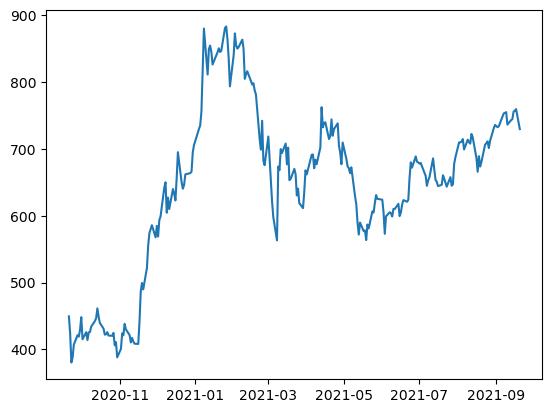

In [14]:
plt.plot(stock_data.Close)

(array([31., 11.,  4., 11., 38., 58., 48., 22., 10., 19.]),
 array([380.359985 , 430.6329892, 480.9059934, 531.1789976, 581.4520018,
        631.725006 , 681.9980102, 732.2710144, 782.5440186, 832.8170228,
        883.090027 ]),
 <BarContainer object of 10 artists>)

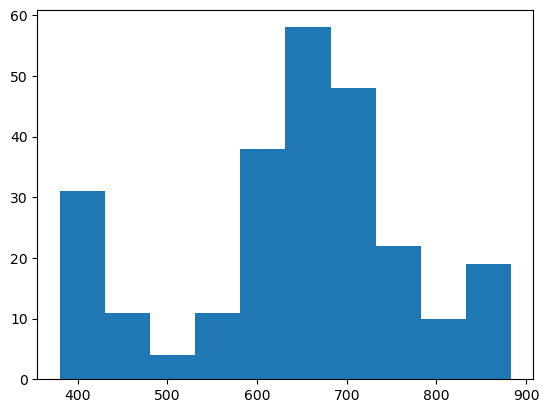

In [15]:
plt.hist(stock_data.Close)

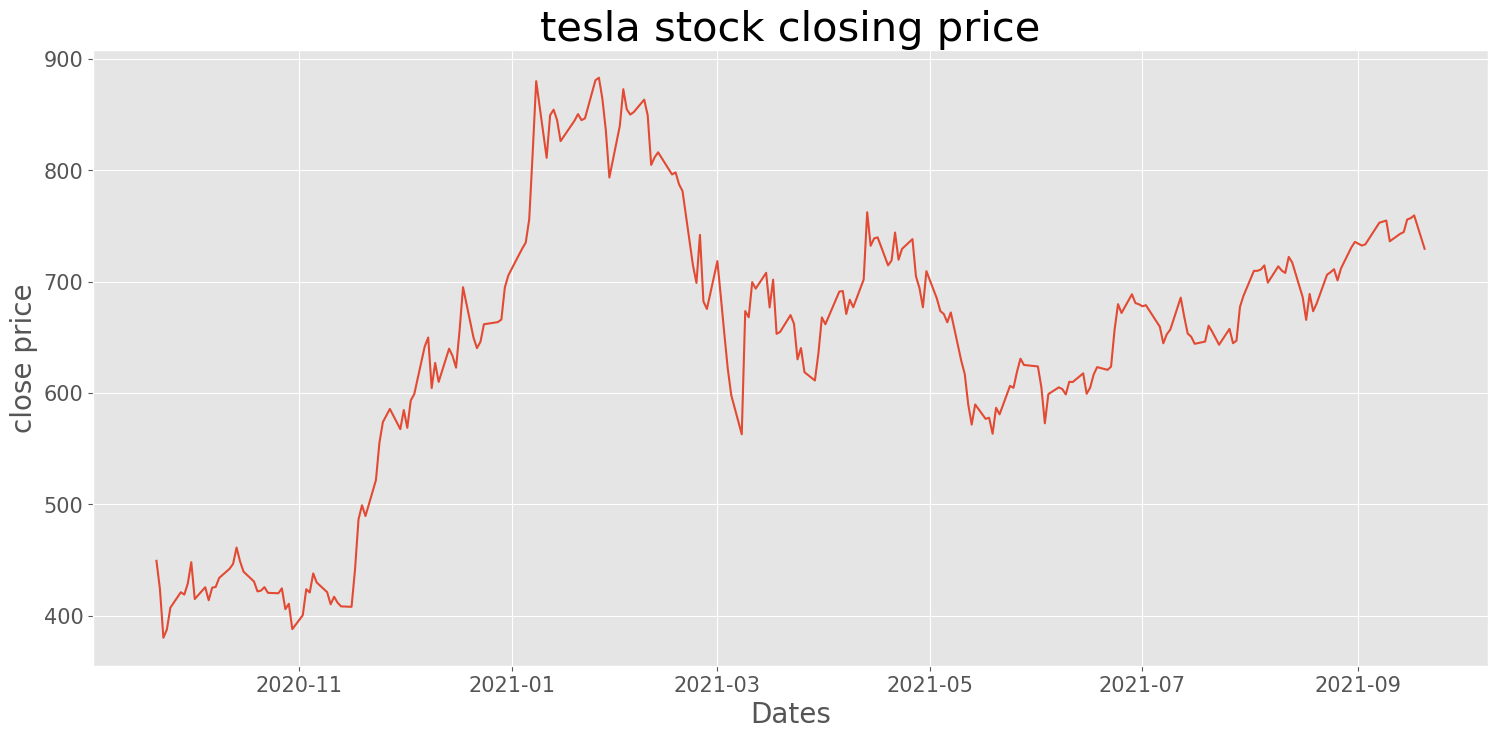

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()

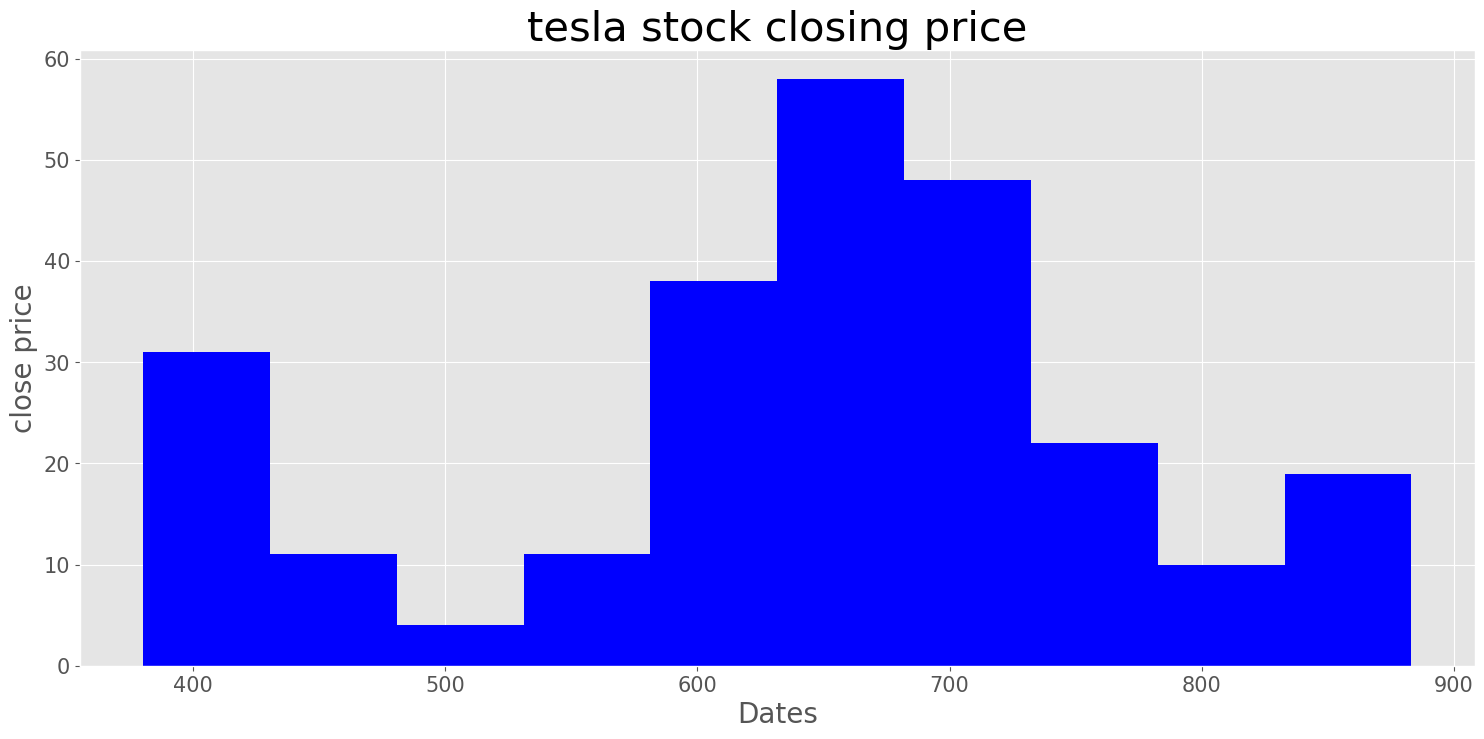

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

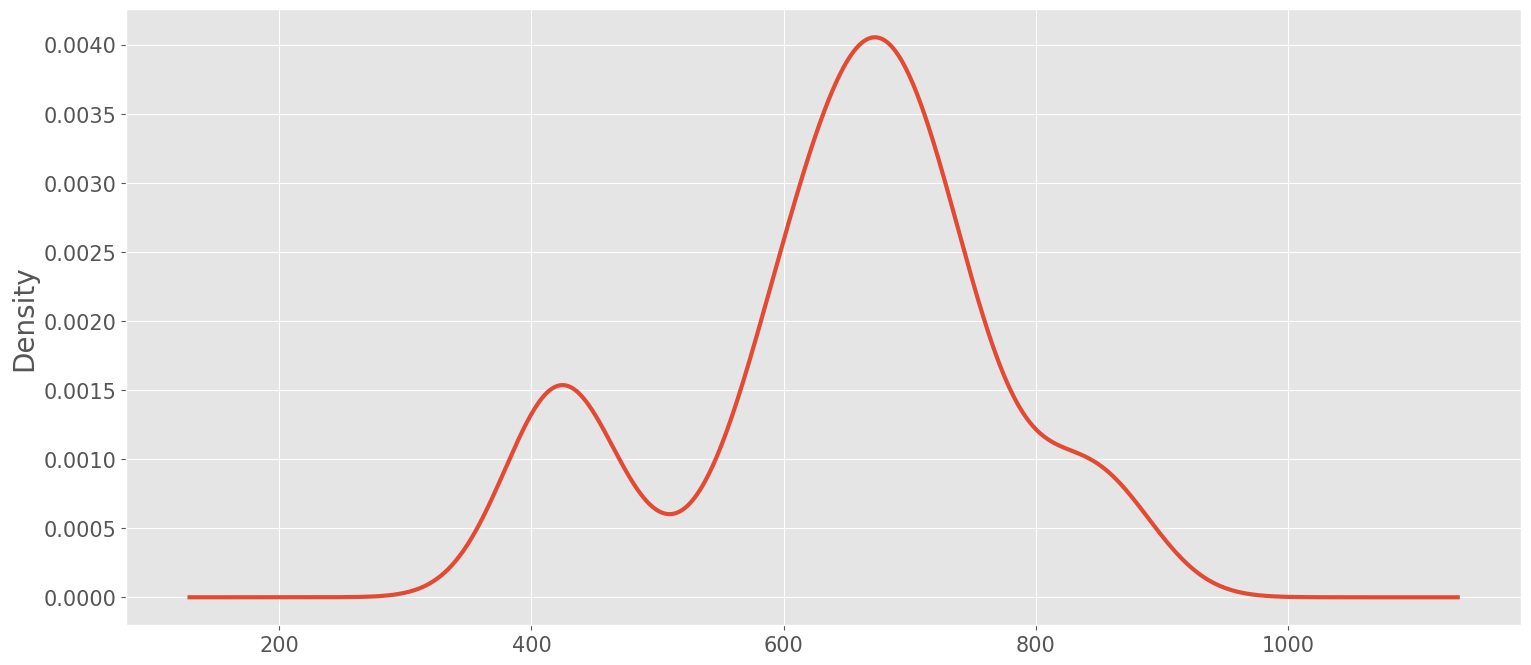

In [18]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [19]:
rolmean=stock_data["Close"].rolling(365).mean()

In [20]:
stock_data["Close"].rolling(3).std()

Date
2020-09-21          NaN
2020-09-22          NaN
2020-09-23    34.935059
2020-09-24    23.479275
2020-09-25    13.936333
                ...    
2021-09-14     4.379509
2021-09-15     7.016951
2021-09-16     6.906419
2021-09-17     1.870425
2021-09-20    16.617041
Name: Close, Length: 252, dtype: float64

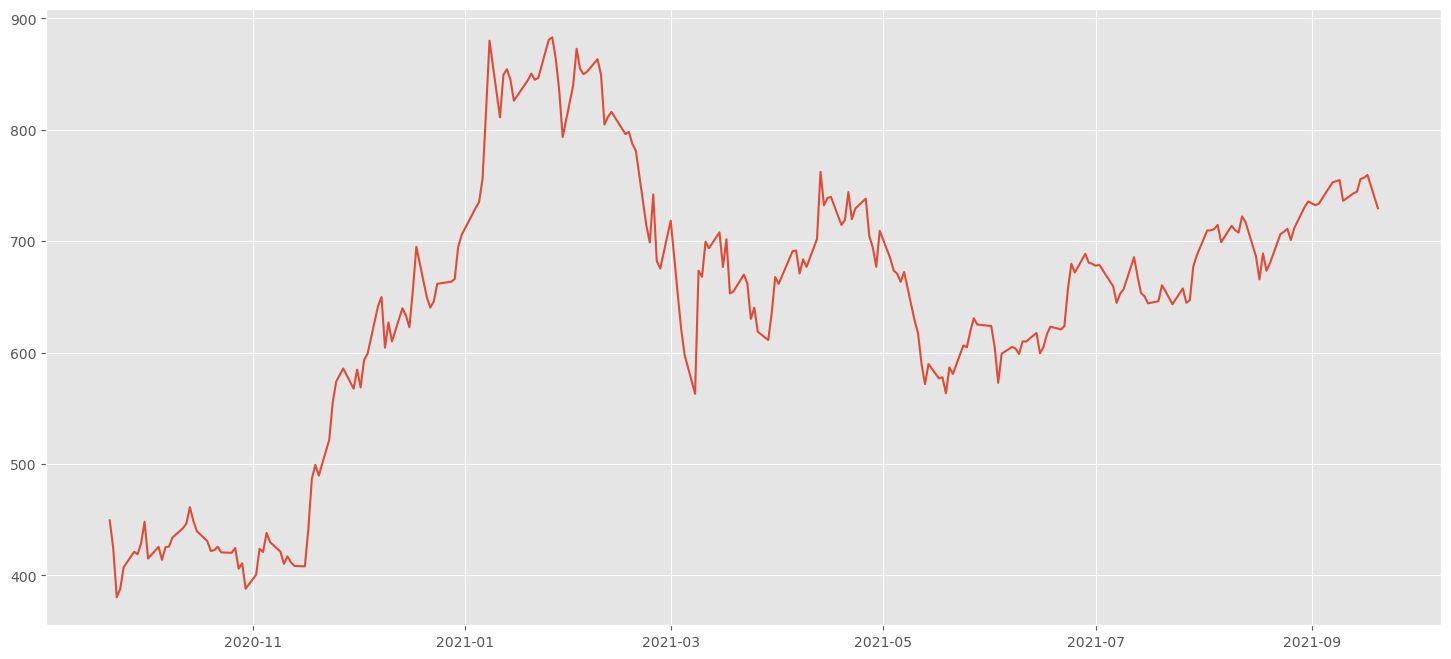

In [292]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [23]:
adft

(-1.7792971260945591,
 0.3907874495192004,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 2130.586977712155)

In [24]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.779297
p-value         0.390787
lag             0.000000
data point    251.000000
dtype: float64

In [25]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

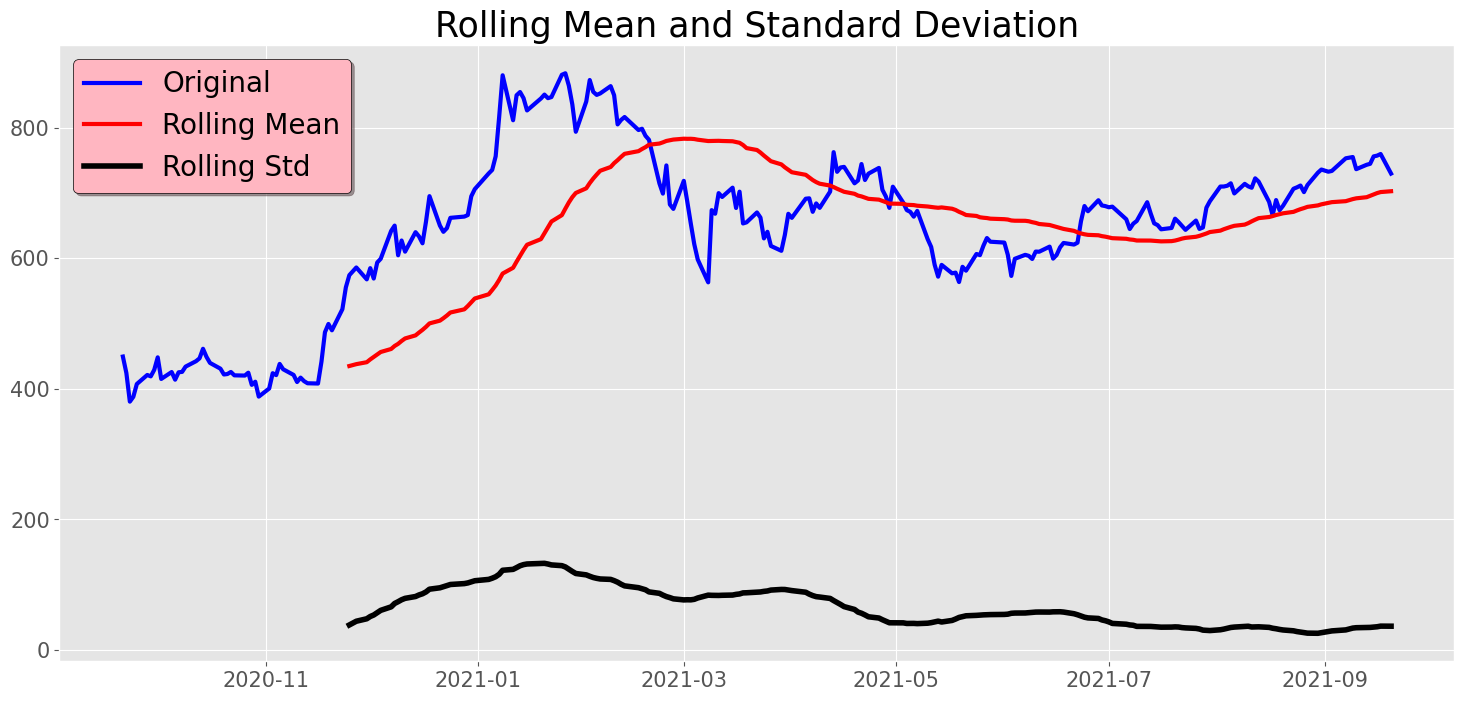

Results of dickey fuller test
Test Statistics                 -1.779297
p-value                          0.390787
No. of lags used                 0.000000
Number of observations used    251.000000
critical value (1%)             -3.456674
critical value (5%)             -2.873125
critical value (10%)            -2.572944
dtype: float64


In [26]:
test_stationarity(stock_data.Close)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

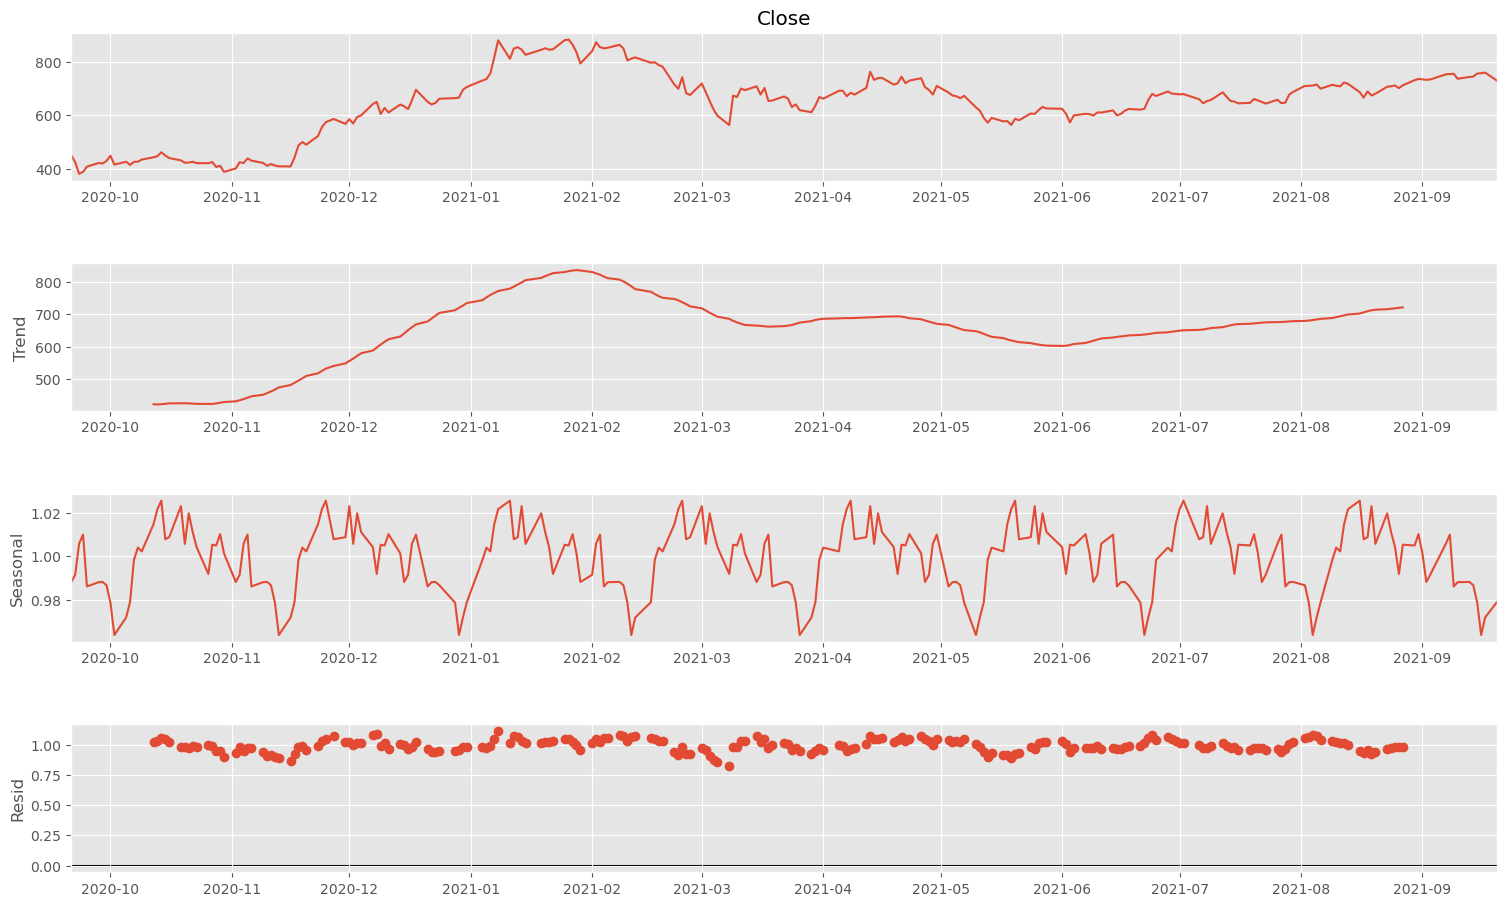

In [28]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [29]:
result.seasonal

Date
2020-09-21    0.988185
2020-09-22    0.991539
2020-09-23    1.005891
2020-09-24    1.010019
2020-09-25    0.986131
                ...   
2021-09-14    0.986666
2021-09-15    0.978647
2021-09-16    0.963752
2021-09-17    0.971809
2021-09-20    0.978860
Name: seasonal, Length: 252, dtype: float64

In [30]:
result.resid

Date
2020-09-21   NaN
2020-09-22   NaN
2020-09-23   NaN
2020-09-24   NaN
2020-09-25   NaN
              ..
2021-09-14   NaN
2021-09-15   NaN
2021-09-16   NaN
2021-09-17   NaN
2021-09-20   NaN
Name: resid, Length: 252, dtype: float64

In [31]:
result.trend

Date
2020-09-21   NaN
2020-09-22   NaN
2020-09-23   NaN
2020-09-24   NaN
2020-09-25   NaN
              ..
2021-09-14   NaN
2021-09-15   NaN
2021-09-16   NaN
2021-09-17   NaN
2021-09-20   NaN
Name: trend, Length: 252, dtype: float64

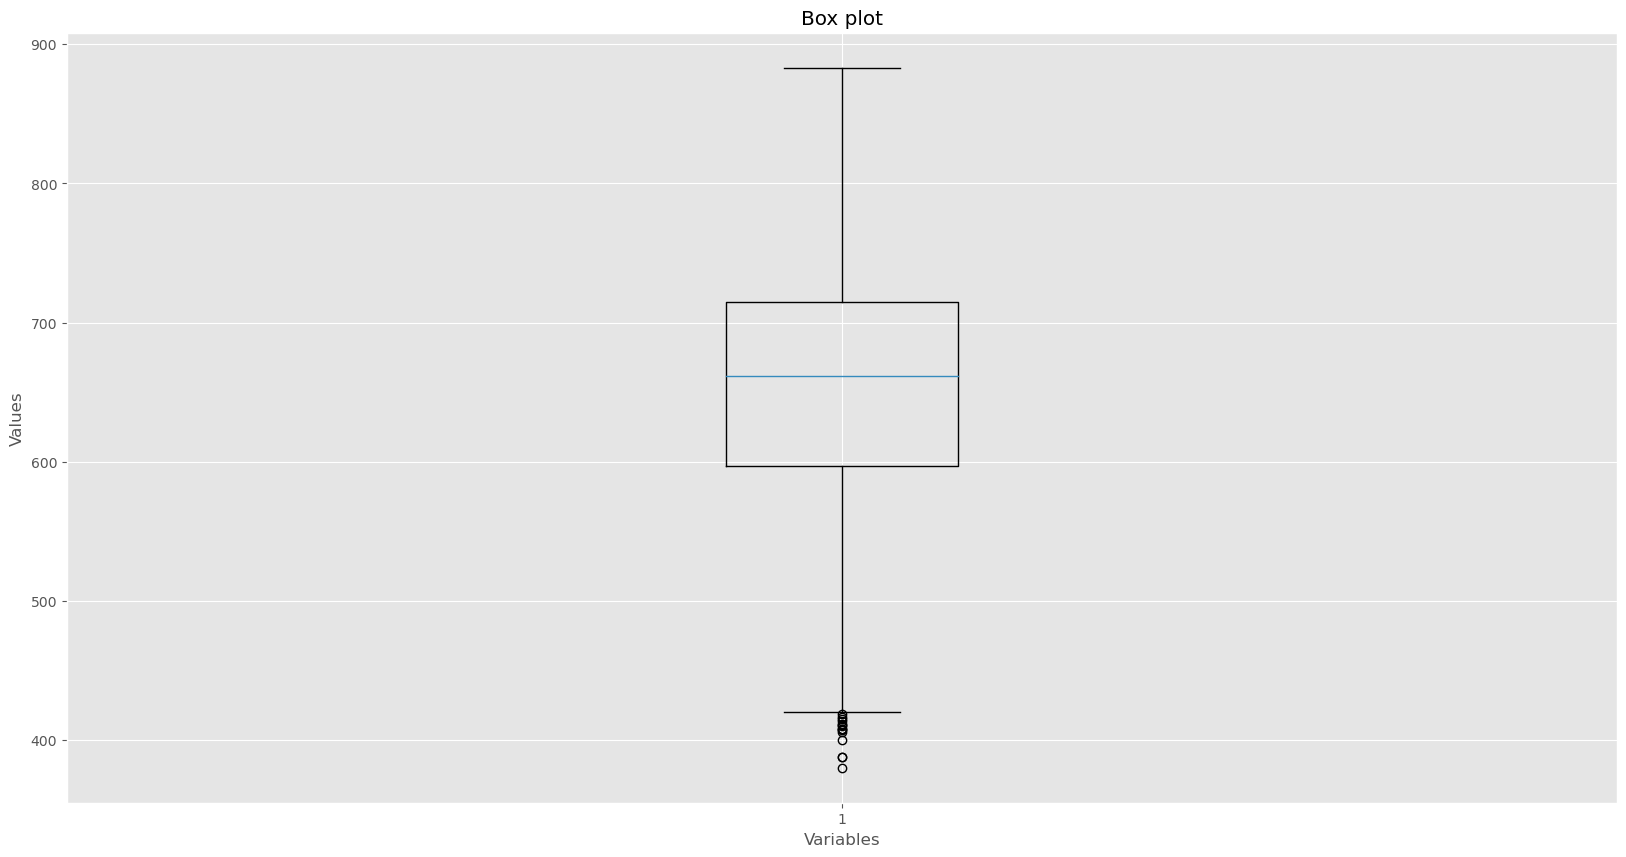

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

<AxesSubplot:xlabel='Close'>

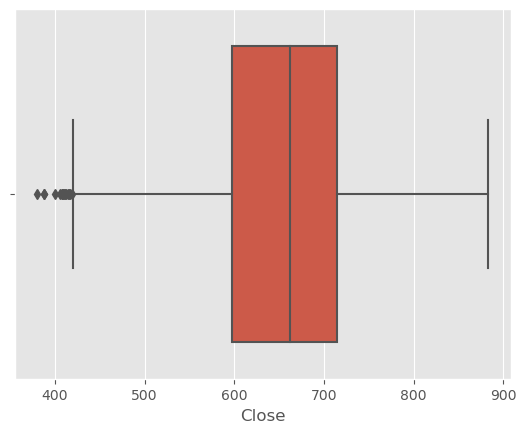

In [47]:
sns.boxplot(stock_data["Close"])

In [290]:
percentile25 = stock_data["Close"].quantile(0.25)
percentile75 = stock_data["Close"].quantile(0.75)
IQR = percentile75 - percentile25

In [291]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [60]:
stock_data[stock_data["Close"] > upper_limit]
stock_data[stock_data["Close"] < lower_limit]

,Close
Date,
2020-09-23,380.359985
2020-09-24,387.790009
2020-09-25,407.339996
2020-09-29,419.070007
2020-10-02,415.089996
2020-10-06,413.980011
2020-10-28,406.019989
2020-10-29,410.829987
2020-10-30,388.040009


In [61]:
new_stock_data = stock_data[stock_data["Close"] > lower_limit]
new_stock_data.shape

(237, 1)

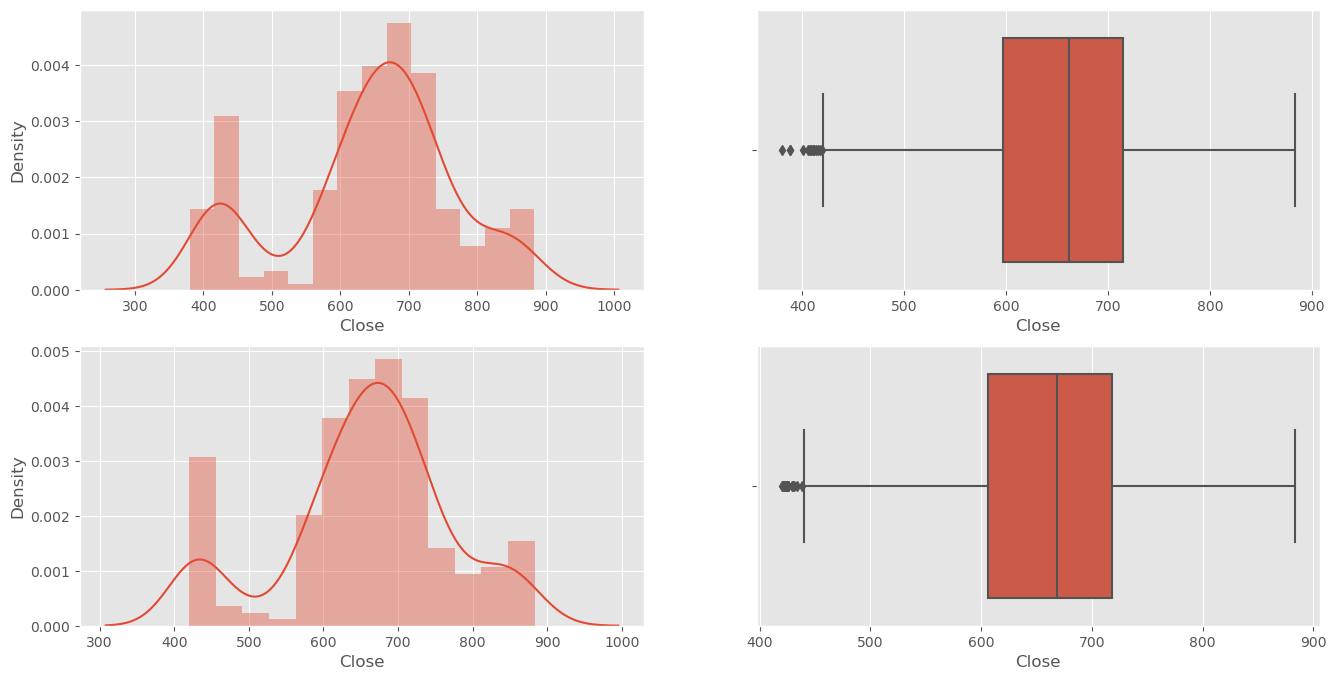

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(stock_data["Close"])
plt.subplot(2,2,2)
sns.boxplot(stock_data["Close"])
plt.subplot(2,2,3)
sns.distplot(new_stock_data['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_stock_data['Close'])
plt.show()

In [63]:
stock_data_cap = stock_data.copy()
stock_data_cap['Close'] = np.where(
    stock_data_cap['Close'] > upper_limit,
    upper_limit,
    np.where(
        stock_data_cap['Close'] < lower_limit,
        lower_limit,
        stock_data_cap['Close']))

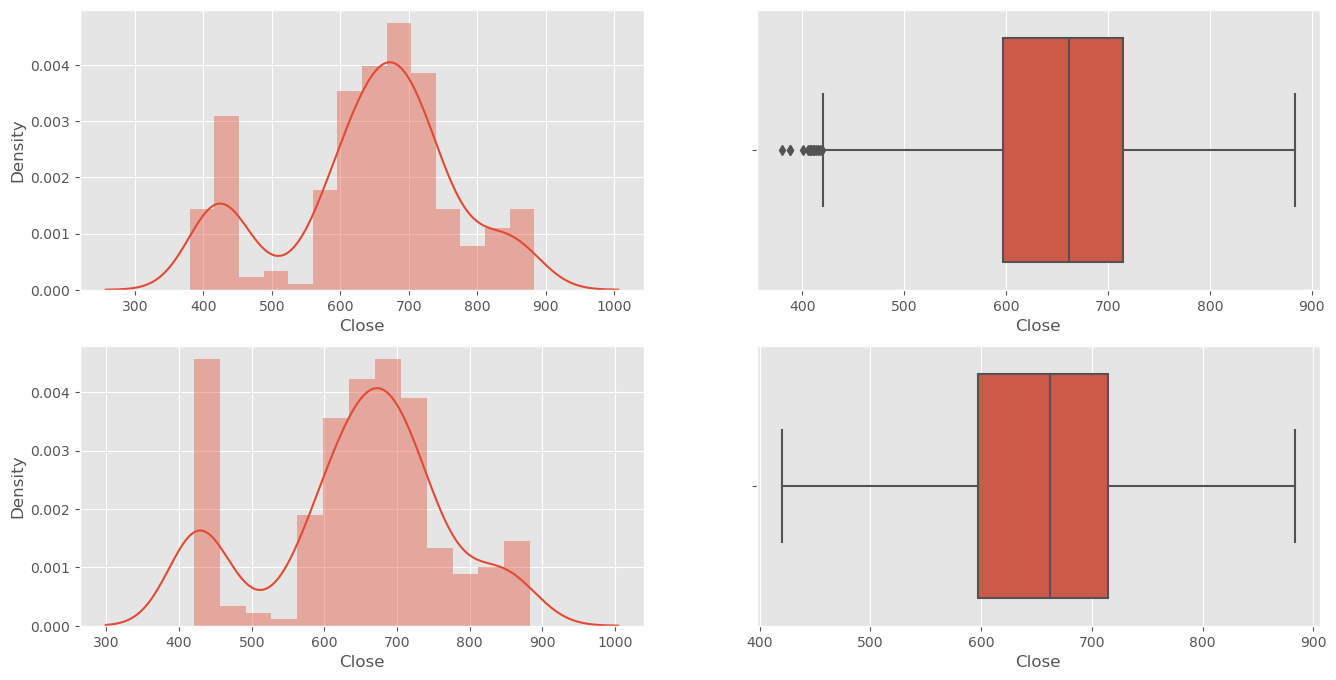

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(stock_data["Close"])
plt.subplot(2,2,2)
sns.boxplot(stock_data["Close"])
plt.subplot(2,2,3)
sns.distplot(stock_data_cap['Close'])
plt.subplot(2,2,4)
sns.boxplot(stock_data_cap['Close'])
plt.show()

In [154]:
Stock__data= stock_data_cap

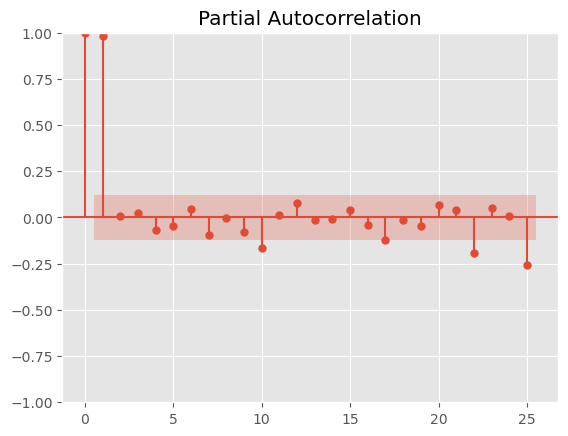

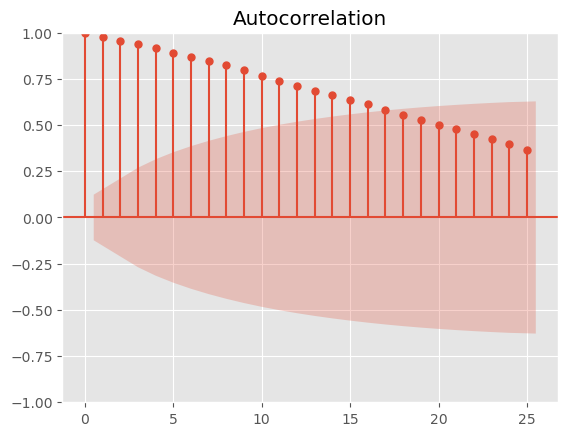

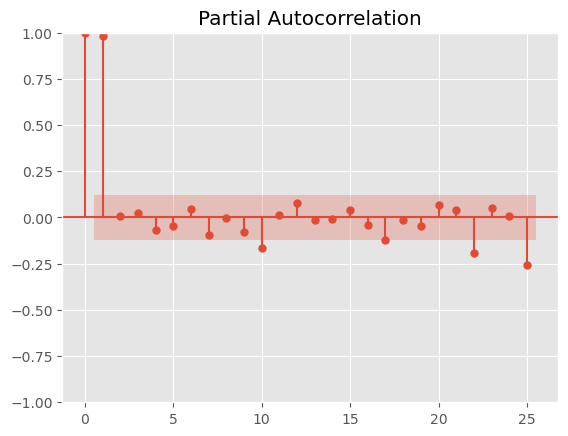

In [155]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(Stock__data.Close)
plot_pacf(Stock__data.Close)

PREPROCESSING OF THE DATA

In [156]:
df_close=Stock__data["Close"]

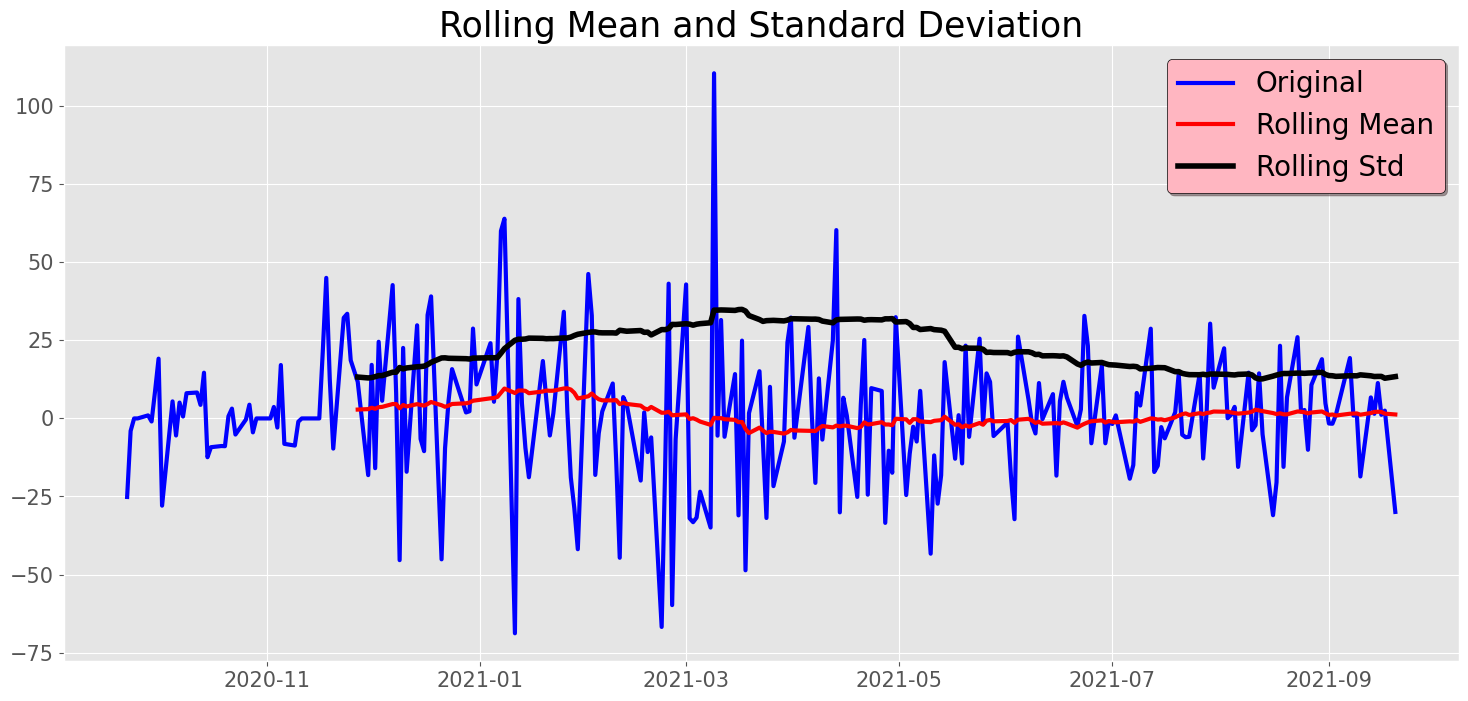

Results of dickey fuller test
Test Statistics               -1.717358e+01
p-value                        6.718395e-30
No. of lags used               0.000000e+00
Number of observations used    2.500000e+02
critical value (1%)           -3.456781e+00
critical value (5%)           -2.873172e+00
critical value (10%)          -2.572969e+00
dtype: float64


In [293]:
tsla_close_diff_1=df_close.diff()
tsla_close_diff_1=tsla_close_diff_1.dropna()
test_stationarity(tsla_close_diff_1)

In [158]:
df_close.diff(2)

Date
2020-09-21          NaN
2020-09-22          NaN
2020-09-23   -29.169991
2020-09-24    -4.009987
2020-09-25     0.000000
                ...    
2021-09-14     8.219970
2021-09-15    12.830017
2021-09-16    12.500000
2021-09-17     3.659973
2021-09-20   -27.450012
Name: Close, Length: 252, dtype: float64

MODEL BUILDING

In [160]:
train_data=df_close[0:-60]
test_data=df_close[-60:]

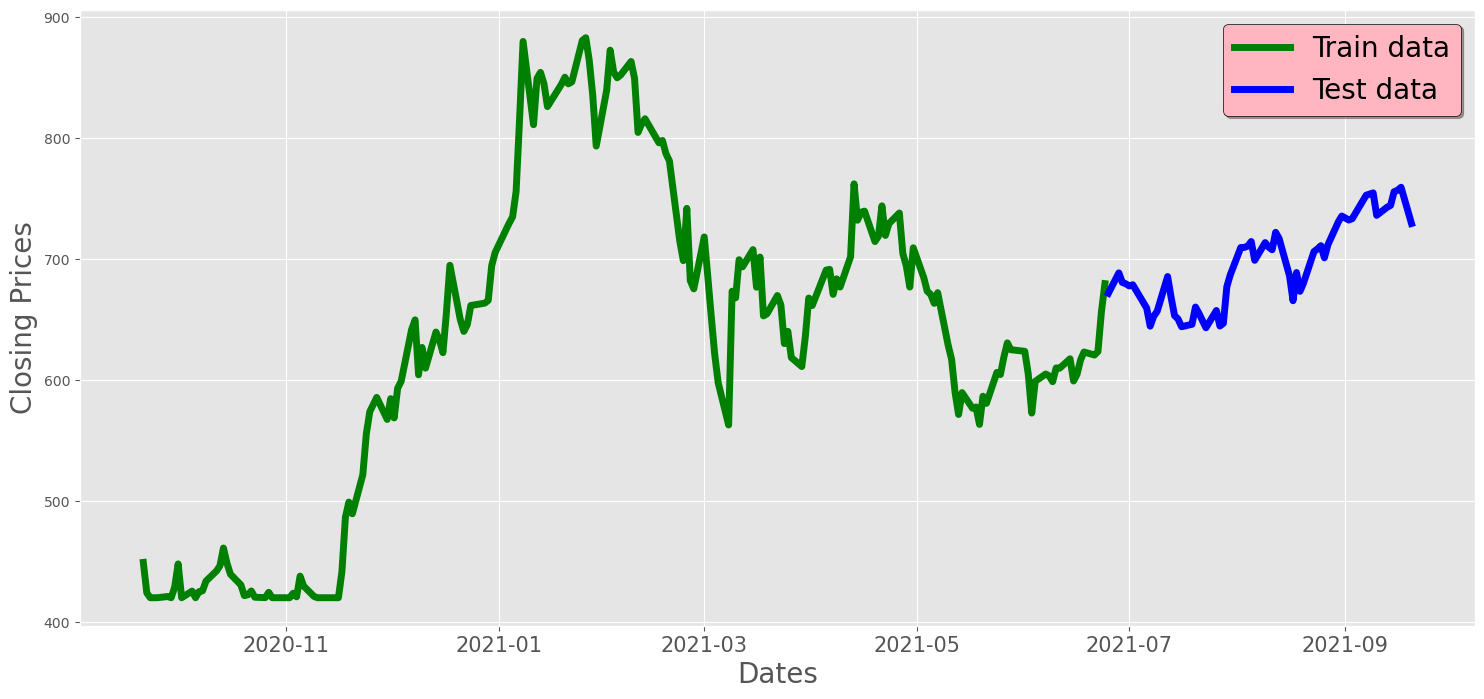

In [161]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [162]:
from statsmodels.tsa.arima.model import ARIMA

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [164]:
history=[x for x in train_data]

In [165]:
history

[449.390015,
 424.230011,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 421.200012,
 420.2200237499999,
 429.01001,
 448.160004,
 420.2200237499999,
 425.679993,
 420.2200237499999,
 425.299988,
 425.920013,
 434.0,
 442.299988,
 446.649994,
 461.299988,
 448.880005,
 439.670013,
 430.829987,
 421.940002,
 422.640015,
 425.790009,
 420.630005,
 420.279999,
 424.679993,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 423.899994,
 420.980011,
 438.089996,
 429.950012,
 421.26001,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 420.2200237499999,
 441.609985,
 486.640015,
 499.269989,
 489.609985,
 521.849976,
 555.380005,
 574.0,
 585.76001,
 567.599976,
 584.76001,
 568.820007,
 593.380005,
 599.039978,
 641.76001,
 649.880005,
 604.47998,
 627.070007,
 609.98999,
 639.830017,
 633.25,
 622.77002,
 655.900024,
 695.0,
 649.859985,
 640.340027,
 645.97998,
 661.77002,
 663.690002,
 665.98999,
 694.780029,
 7

In [166]:
model=ARIMA(history,order=(1,1,1))

In [167]:
model=model.fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -875.888
Date:                Wed, 09 Aug 2023   AIC                           1757.775
Time:                        14:41:16   BIC                           1767.532
Sample:                             0   HQIC                          1761.727
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0953      0.664      0.144      0.886      -1.206       1.396
ma.L1         -0.1897      0.637     -0.298      0.766      -1.438       1.058
sigma2       563.2284     41.874     13.451      0.000     481.157     645.300
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                37.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.38
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
model.forecast()

array([677.02785571])

In [172]:
test_data[0]

671.869995

In [175]:
mean_squared_error([test_data[0]],[model.forecast()[0]])

26.603527110809065

In [176]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [177]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [178]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=69.367
ARIMA(0, 0, 1) RMSE=38.904
ARIMA(0, 0, 2) RMSE=28.966
ARIMA(0, 1, 0) RMSE=13.373
ARIMA(0, 1, 1) RMSE=13.391
ARIMA(0, 1, 2) RMSE=13.367
ARIMA(0, 2, 0) RMSE=19.053
ARIMA(0, 2, 1) RMSE=13.405
ARIMA(0, 2, 2) RMSE=13.431
ARIMA(1, 0, 0) RMSE=13.459
ARIMA(1, 0, 1) RMSE=13.448
ARIMA(1, 0, 2) RMSE=13.398
ARIMA(1, 1, 0) RMSE=13.395
ARIMA(1, 1, 1) RMSE=13.381
ARIMA(1, 1, 2) RMSE=13.363
ARIMA(1, 2, 0) RMSE=17.237
ARIMA(1, 2, 1) RMSE=13.429
ARIMA(1, 2, 2) RMSE=13.448
ARIMA(2, 0, 0) RMSE=13.489
ARIMA(2, 0, 1) RMSE=13.494
ARIMA(2, 0, 2) RMSE=13.362
ARIMA(2, 1, 0) RMSE=13.369
ARIMA(2, 1, 1) RMSE=13.371
ARIMA(2, 1, 2) RMSE=13.931
ARIMA(2, 2, 0) RMSE=16.220
ARIMA(2, 2, 1) RMSE=13.540
ARIMA(2, 2, 2) RMSE=13.419
Best ARIMA(2, 0, 2) RMSE=13.362


In [210]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(2,0,2))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 13.370801792941332


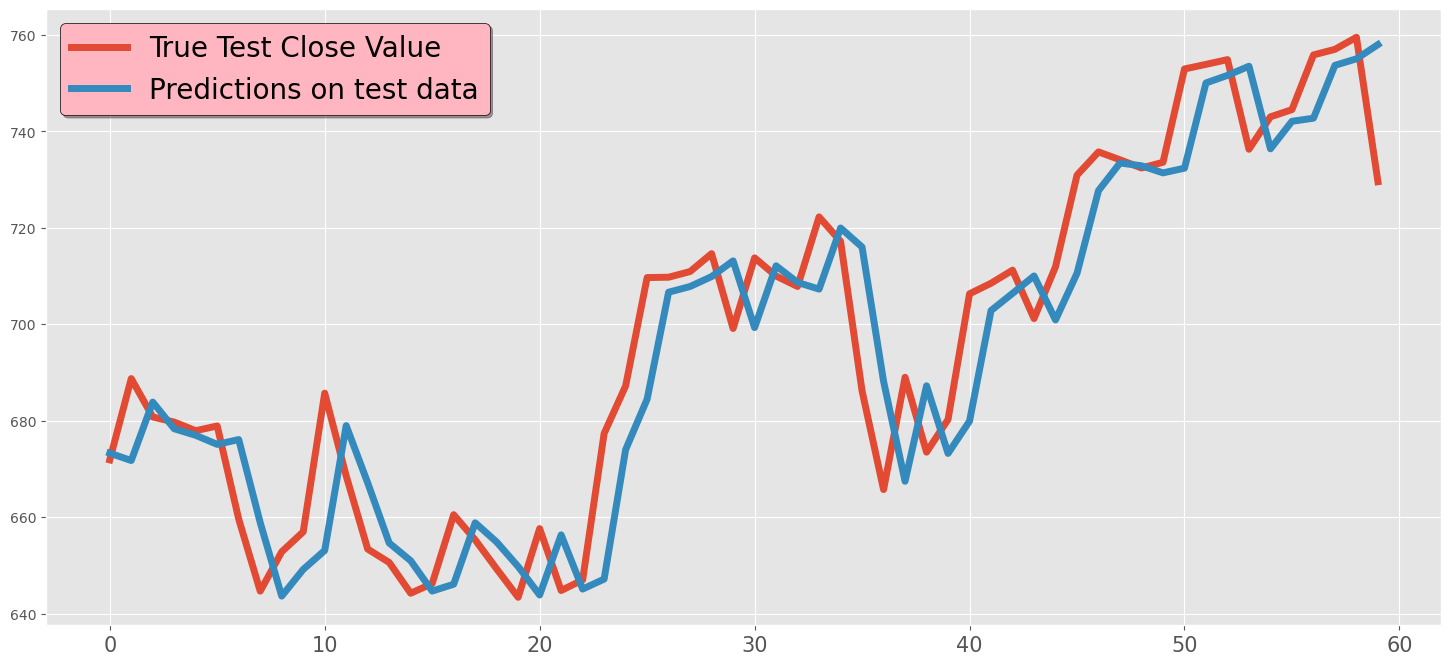

In [211]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [216]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model1=sm.tsa.statespace.SARIMAX(history,order=(2,0,2),seasonal_order=(1,1,1,3))
    model_fit1=model1.fit()
    fc=model_fit1.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of SARIMAX Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of SARIMAX Model: 13.869023793512332


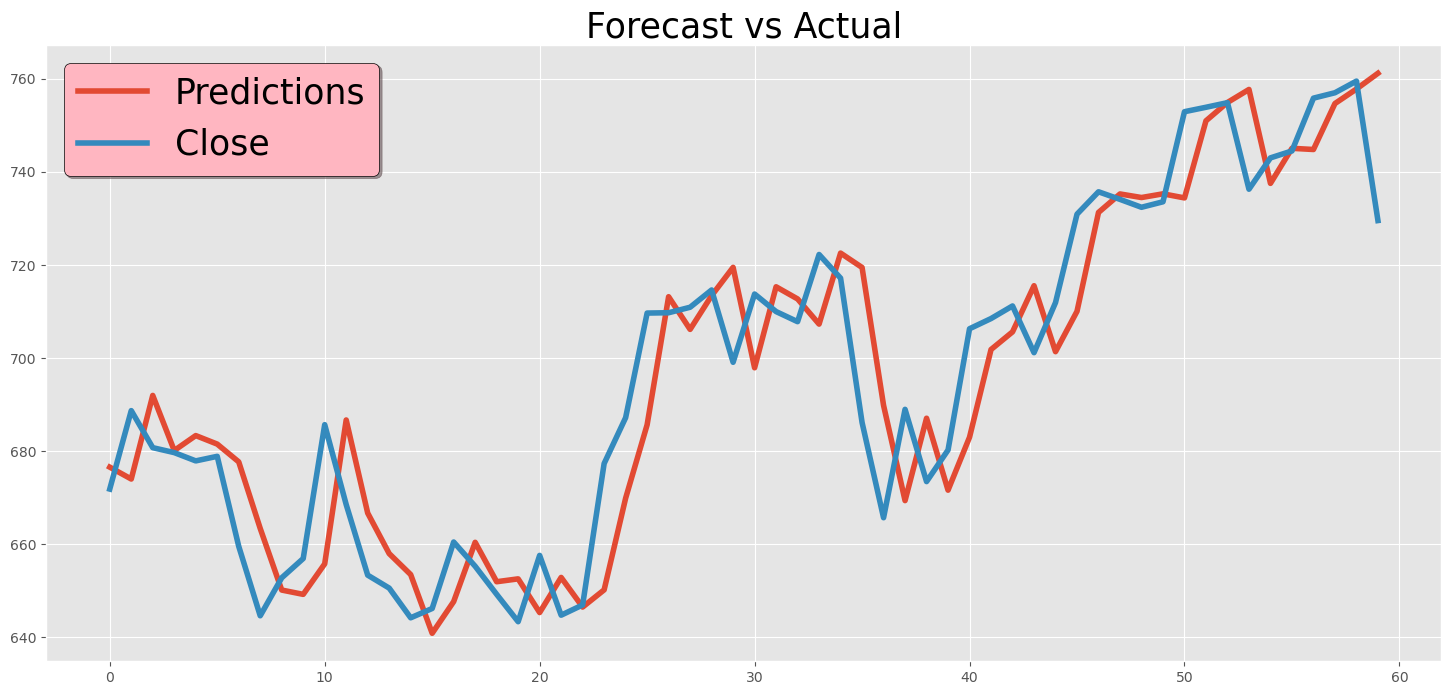

In [217]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [218]:
df_close

Date
2020-09-21    449.390015
2020-09-22    424.230011
2020-09-23    420.220024
2020-09-24    420.220024
2020-09-25    420.220024
                 ...    
2021-09-14    744.489990
2021-09-15    755.830017
2021-09-16    756.989990
2021-09-17    759.489990
2021-09-20    729.539978
Name: Close, Length: 252, dtype: float64

In [220]:
from statsmodels.graphics.tsaplots import plot_predict

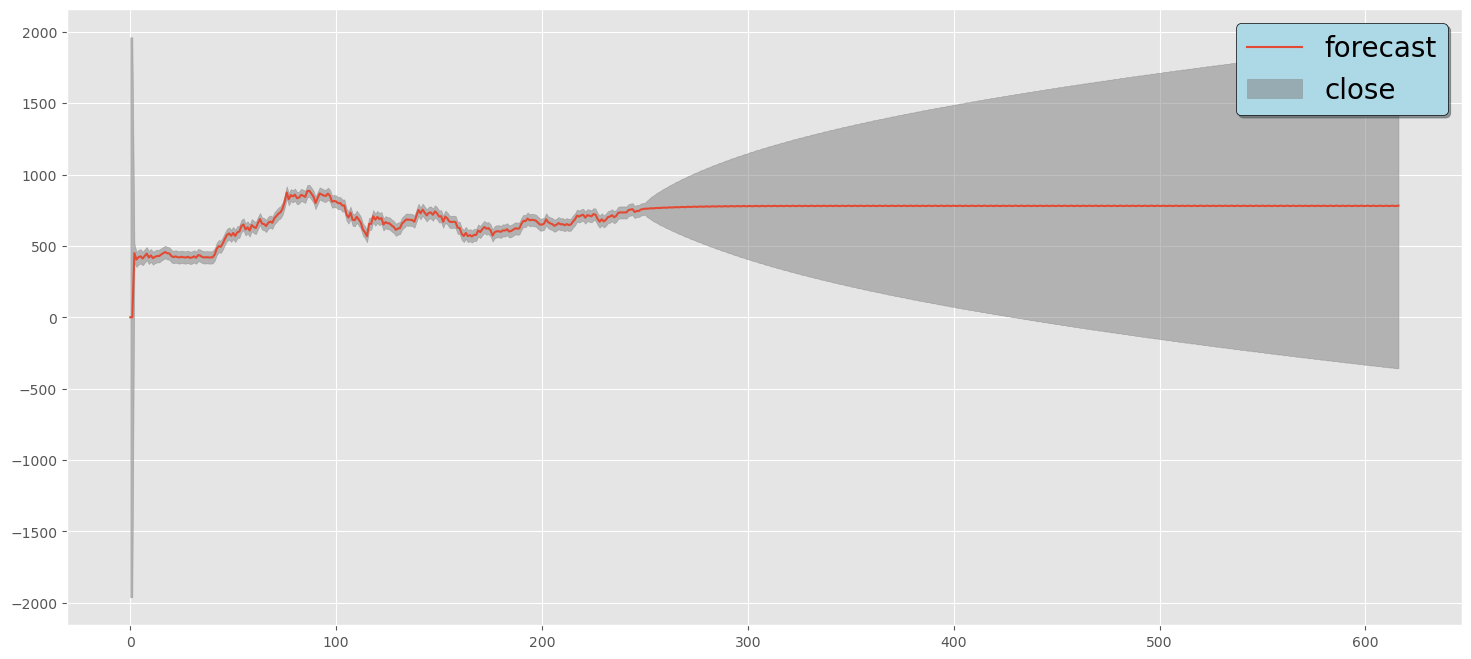

In [263]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
plot_predict(model_fit,start=1,end=len(df_close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()

In [243]:
from pandas.tseries.offsets import DateOffset
from datetime import datetime, timedelta

In [286]:
forecast_steps = 180  # Number of future steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)


In [287]:
forecast_dates = pd.date_range(start=df_close.index[-1] + timedelta(days=1), periods=forecast_steps, freq='D')

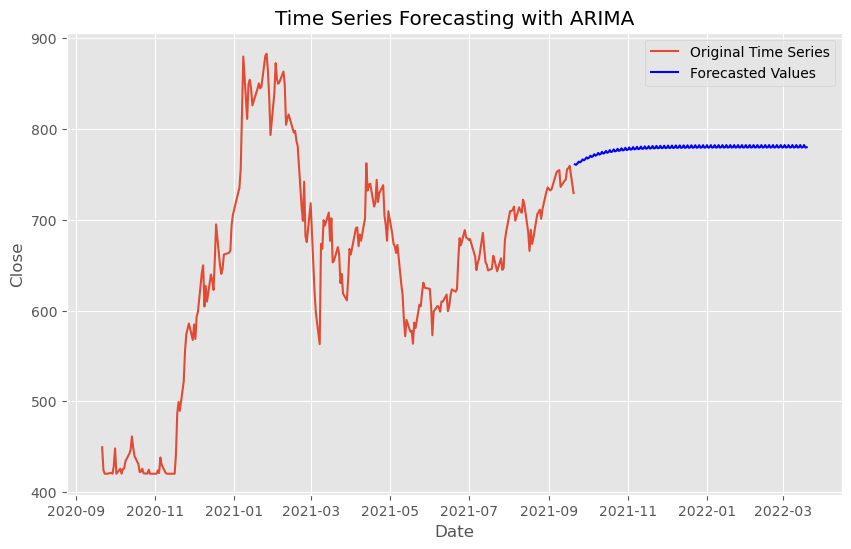

In [288]:
plt.figure(figsize=(10, 6))
plt.plot(df_close, label='Original Time Series')
plt.plot(forecast_dates, forecast, label='Forecasted Values', color='blue')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()